# Project Title: Face Recognition and Detection Using Convolutional Neural Networks (CNN)
# Description: 
In this project, you will build a Convolutional Neural Network (CNN) model for face recognition and detection. You will work with a facial recognition dataset to implement a system that can accurately identify and verify faces in images. This project will require you to preprocess the dataset, build and train a CNN model, implement face detection, and evaluate the model's performance using appropriate metrics.

# Part 1: Face Detection and Dataset Preprocessing


## 1.1 Face Detection
- Utilize OpenCV's DNN module for face detection.
- Pre-trained face detection model files (.prototxt and .caffemodel) are required.
- Confidence threshold set to 0.5.
- Support for multiple face detections in an image.

In [ ]:
# !pip install opencv-python opencv-python-headless numpy
# !pip install typing-extensions
# !pip install --upgrade typing_extensions

In [34]:
# Import Libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

In [35]:
# Paths to pre-trained model files
prototxt_path = r"D:\Sprints\Deep Learning\Capstone Project\Deep Learning Project\Pre-Trained Models\deploy.prototxt"
caffemodel_path = r"D:\Sprints\Deep Learning\Capstone Project\Deep Learning Project\Pre-Trained Models\res10_300x300_ssd_iter_140000.caffemodel"

# Check if model files exist
print("Checking model file paths:")
print("Prototxt exists:", os.path.exists(prototxt_path))  
print("Caffemodel exists:", os.path.exists(caffemodel_path))  

Checking model file paths:
Prototxt exists: True
Caffemodel exists: True


In [36]:
# Load pre-trained model
net = cv2.dnn.readNetFromCaffe(prototxt_path, caffemodel_path)

Original Image Shape: (668, 550, 3)
Total Detections: 200
Detection 1 Confidence: 1.00
Face 1 Bounding Box: (51, 20), (522, 655)
Detection 2 Confidence: 0.09
Detection 3 Confidence: 0.08
Detection 4 Confidence: 0.08
Detection 5 Confidence: 0.08
Detection 6 Confidence: 0.08
Detection 7 Confidence: 0.07
Detection 8 Confidence: 0.07
Detection 9 Confidence: 0.07
Detection 10 Confidence: 0.07
Detection 11 Confidence: 0.07
Detection 12 Confidence: 0.07
Detection 13 Confidence: 0.07
Detection 14 Confidence: 0.07
Detection 15 Confidence: 0.07
Detection 16 Confidence: 0.07
Detection 17 Confidence: 0.07
Detection 18 Confidence: 0.07
Detection 19 Confidence: 0.07
Detection 20 Confidence: 0.07
Detection 21 Confidence: 0.07
Detection 22 Confidence: 0.07
Detection 23 Confidence: 0.07
Detection 24 Confidence: 0.07
Detection 25 Confidence: 0.07
Detection 26 Confidence: 0.07
Detection 27 Confidence: 0.07
Detection 28 Confidence: 0.07
Detection 29 Confidence: 0.07
Detection 30 Confidence: 0.07
Detection

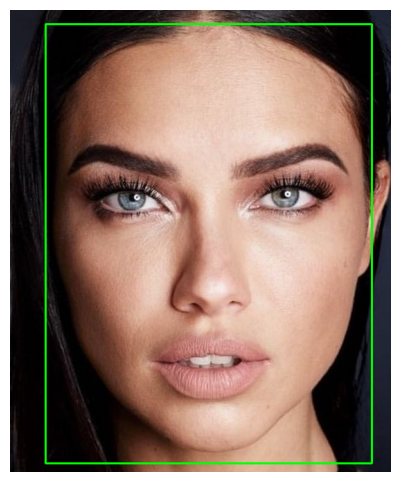

In [37]:
def detect_faces(image_path, confidence_threshold=0.5):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to load image.")
        return

    print("Original Image Shape:", image.shape)

    (h, w) = image.shape[:2]

    # Preprocess image for face detection
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    net.setInput(blob)
    detections = net.forward()

    print(f"Total Detections: {detections.shape[2]}")  # Number of faces detected

    # Loop over detections
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        print(f"Detection {i+1} Confidence: {confidence:.2f}")

        # Filter out weak detections
        if confidence > confidence_threshold:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            print(f"Face {i+1} Bounding Box: ({startX}, {startY}), ({endX}, {endY})")

            # Draw bounding box
            cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)

    # # Display output
    # cv2.imshow("Face Detection", image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    # Convert BGR to RGB for displaying in Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display output using matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.axis("off")  # Hide axes
    plt.show()



# Test face detection
test_image_path = r"D:\Sprints\Deep Learning\Capstone Project\Deep Learning Project\105_classes_pins_dataset\pins_Adriana Lima\Adriana Lima0_0.jpg"
detect_faces(test_image_path)

In [ ]:
# import cv2
# import numpy as np
# from matplotlib import pyplot as plt

# # Corrected file paths using raw strings
# prototxt_path = r"D:\Sprints\Deep Learning\Capstone Project\Deep Learning Project\Pre-Trained Models\deploy.prototxt"
# caffemodel_path = r"D:\Sprints\Deep Learning\Capstone Project\Deep Learning Project\Pre-Trained Models\res10_300x300_ssd_iter_140000.caffemodel"

# import os
# print(os.path.exists(prototxt_path))  # Should return True
# print(os.path.exists(caffemodel_path))  # Should return True

# # Load pre-trained model
# net = cv2.dnn.readNetFromCaffe(prototxt_path, caffemodel_path)

# def detect_faces(image_path, confidence_threshold=0.5):
#     # Load image
#     image = cv2.imread(image_path)
#     if image is None:
#         print("Error: Unable to load image.")
#         return

#     (h, w) = image.shape[:2]

#     # Preprocess image for face detection
#     blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
#     net.setInput(blob)
#     detections = net.forward()

#     # Loop over detections
#     for i in range(0, detections.shape[2]):
#         confidence = detections[0, 0, i, 2]

#         # Filter out weak detections
#         if confidence > confidence_threshold:
#             box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
#             (startX, startY, endX, endY) = box.astype("int")

#             # Draw bounding box
#             cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)

#     # # Display output
#     # cv2.imshow("Face Detection", image)
#     # cv2.waitKey(0)
#     # cv2.destroyAllWindows()

#     # Convert BGR to RGB for displaying in Matplotlib
#     image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#     # Display output using matplotlib
#     plt.figure(figsize=(8, 6))
#     plt.imshow(image_rgb)
#     plt.axis("off")  # Hide axes
#     plt.show()


# # Test face detection
# detect_faces(r"D:\Sprints\Deep Learning\Capstone Project\Deep Learning Project\105_classes_pins_dataset\pins_Adriana Lima\Adriana Lima0_0.jpg")

## ●    1.2 Dataset Preprocessing
- Load the LFW dataset for face recognition.
- Convert grayscale images to RGB and resize them to (299, 299) for compatibility with InceptionV3.
- Normalize pixel values for consistent input processing.
- Split the dataset into training (80%), validation (20% of training), and test (20%) sets.
- Implement data augmentation techniques: rotation, width/height shifts, and horizontal flips.

!pip install tensorflow scikit-learn matplotlib

In [38]:
# Import Libaries
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import matplotlib.pyplot as plt

Loading LFW dataset...
Dataset loaded: 1288 images with 7 unique identities


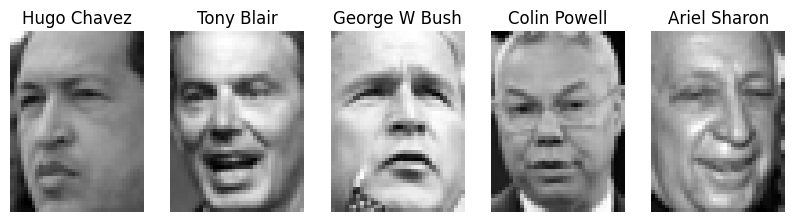

In [40]:
# Load LFW dataset
print("Loading LFW dataset...")
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.images
y = lfw_people.target
target_names = lfw_people.target_names

print(f"Dataset loaded: {len(X)} images with {len(target_names)} unique identities")

# Display some original grayscale images
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X[i], cmap='gray')
    plt.title(target_names[y[i]])
    plt.axis("off")
plt.show()

Converting grayscale to RGB and resizing images to (299, 299)...
New Image Shape: (1288, 299, 299, 3)


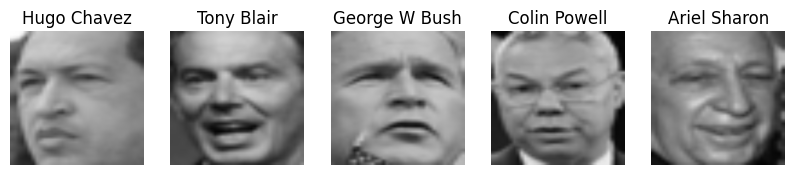

In [42]:
# Convert grayscale to RGB and resize to (299, 299)
print("Converting grayscale to RGB and resizing images to (299, 299)...")
X_rgb = np.array([cv2.cvtColor(cv2.resize(img, (299, 299)), cv2.COLOR_GRAY2RGB) for img in X])
print("New Image Shape:", X_rgb.shape)

# Display transformed images
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_rgb[i])
    plt.title(target_names[y[i]])
    plt.axis("off")
plt.show()

Normalizing pixel values (scaling between 0 and 1)...


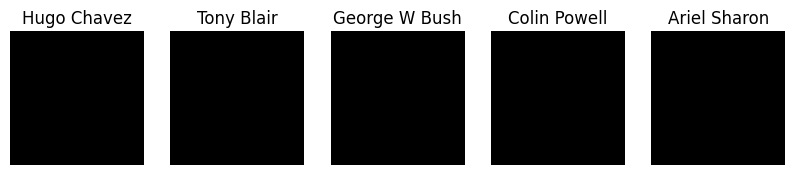

In [44]:
# Normalize pixel values
print("Normalizing pixel values (scaling between 0 and 1)...")
X_rgb = X_rgb.astype('float32') / 255.0

# Display transformed images
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_rgb[i])
    plt.title(target_names[y[i]])
    plt.axis("off")
plt.show()

In [45]:
# Split dataset
print("Splitting dataset into train, validation, and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X_rgb, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Train set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Splitting dataset into train, validation, and test sets...
Train set: 824 samples
Validation set: 206 samples
Test set: 258 samples


Applying data augmentation...


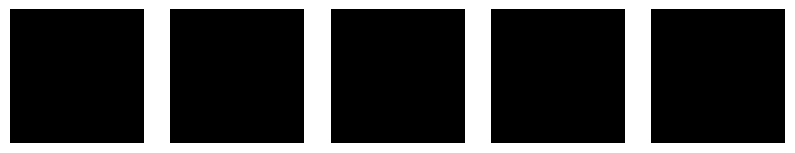

In [46]:
# Data augmentation
print("Applying data augmentation...")
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

# Display augmented images
augmented_images = next(datagen.flow(X_train[:5], batch_size=5))
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis("off")
plt.show()

In [ ]:
# from sklearn.datasets import fetch_lfw_people
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import numpy as np

# # Load LFW dataset
# lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# # Extract images and labels
# X = lfw_people.images
# y = lfw_people.target

# # Convert grayscale to RGB and resize to (299, 299)
# X = np.stack([cv2.cvtColor(cv2.resize(img, (299, 299)), cv2.COLOR_GRAY2RGB) for img in X])

# # Normalize pixel values
# X = X.astype('float32') / 255.0

# # Split dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # Data augmentation
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True
# )
# datagen.fit(X_train)

# Part 2: Face Recognition with Inception V3 Transfer Learning


## ●    2.1 Load and Modify Inception V3
- Use TensorFlow/Keras Inception V3 with pre-trained weights on ImageNet.
- Modify model architecture:
  - Add a Global Average Pooling layer.
  - Include a Dense layer (128 neurons, ReLU activation).
  - Apply Dropout (0.5) for regularization.
  - Use a final Dense layer with softmax activation for classification.
  - Freeze base model layers to retain pre-trained feature extraction.

In [47]:
#!pip install tensorflow onnx tf2onnx

In [55]:
# Import Libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tf2onnx
import onnx

In [56]:
# Load InceptionV3 with pre-trained weights
print("Loading InceptionV3 model...")
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
print("Base model loaded. Model summary:")
base_model.summary()

Loading InceptionV3 model...
Base model loaded. Model summary:


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_188 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_188[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_188      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_189 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_188[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_189[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_189      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_190 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_189[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_190[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_190      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 73, 73,    │          0 │ activation_190[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_191 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_8[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_191[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_191      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_192 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_191[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_192[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_192      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [57]:
# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False
print("Base model layers frozen.")

Base model layers frozen.


In [58]:
# Add custom layers


x = base_model.output
x = GlobalAveragePooling2D()(x)
print(f"After GlobalAveragePooling2D: {x.shape}")
x = Dense(128, activation='relu')(x)
print(f"After Dense layer (128 neurons): {x.shape}")
x = Dropout(0.5)(x)
print(f"After Dropout (0.5): {x.shape}")
# predictions = Dense(10, activation='softmax')(x)  # Adjust to match number of classes
predictions = Dense(len(lfw_people.target_names), activation='softmax')(x)
print(f"Final output shape: {predictions.shape}")

After GlobalAveragePooling2D: (None, 2048)
After Dense layer (128 neurons): (None, 128)
After Dropout (0.5): (None, 128)
Final output shape: (None, 7)


In [59]:
# Build final model
model = Model(inputs=base_model.input, outputs=predictions)
print("Final model created.")
model.summary()

Final model created.


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_188 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_188[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_188      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_189 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_188[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_189[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_189      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_190 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_189[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_190[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_190      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 73, 73,    │          0 │ activation_190[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_191 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_8[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_191[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_191      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_192 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_191[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_192[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_192      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 22,065,959 (84.17 MB)

 Trainable params: 263,175 (1.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
# from tensorflow.keras.applications import InceptionV3
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
# from tensorflow.keras.models import Model

# # Load InceptionV3 with pre-trained weights
# base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# # Freeze base model layers
# for layer in base_model.layers:
#     layer.trainable = False

# # Add custom layers
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(128, activation='relu')(x)
# x = Dropout(0.5)(x)
# predictions = Dense(len(lfw_people.target_names), activation='softmax')(x)

# # Build final model
# model = Model(inputs=base_model.input, outputs=predictions)

## 2.2 Training the Model
- Optimizer: Adam with a learning rate of 0.001.
- Loss function: Categorical crossentropy.
- Metrics: Accuracy.
- Implement callbacks:
  - Early stopping to monitor validation loss with a patience of 5 epochs.
  - Learning rate reduction upon validation loss plateau (factor 0.1, patience 3).

In [60]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Model compiled successfully.")

Model compiled successfully.


In [61]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
print("Callbacks initialized.")

Callbacks initialized.


In [62]:
# Train model
history = model.fit(datagen.flow(X_train, y_train, batch_size=16),
                    validation_data=(X_val, y_val),
                    epochs=20,
                    callbacks=[early_stopping, reduce_lr])
print("Training would start here... (Dataset required)")

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.3266 - loss: 1.8734 - val_accuracy: 0.3786 - val_loss: 1.7065 - learning_rate: 0.0010
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.4045 - loss: 1.7616 - val_accuracy: 0.3786 - val_loss: 1.7000 - learning_rate: 0.0010
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.3687 - loss: 1.7496 - val_accuracy: 0.3786 - val_loss: 1.7376 - learning_rate: 0.0010
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.4021 - loss: 1.7748 - val_accuracy: 0.3786 - val_loss: 1.7071 - learning_rate: 0.0010
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.3941 - loss: 1.7811 - val_accuracy: 0.3786 - val_loss: 1.7026 - learning_rate: 0.0010
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.4143 - loss: 1.7349 - val_accuracy: 0.3786 - val_loss: 1.7060 - learning_rate: 1.0000e-04
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.4012 - loss: 1.7475 - val_accur

In [ ]:
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# # Compile model
# model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=5)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

# # Train model
# history = model.fit(
#     datagen.flow(X_train, y_train, batch_size=16),
#     validation_data=(X_val, y_val),
#     epochs=20,
#     callbacks=[early_stopping, reduce_lr]
# )

## 2.3 Optimization Techniques
- Convert and save the trained model in ONNX format.
- Apply TensorFlow Lite (TFLite) quantization for efficient mobile deployment.
- Extract feature embeddings from the trained model for similarity-based recognition.

In [63]:
# Convert to ONNX
print("Converting model to ONNX format...")
spec = (tf.TensorSpec((None, 299, 299, 3), tf.float32, name="input"),)
output_path = "face_recognition.onnx"
model_proto, _ = tf2onnx.convert.from_keras(model, input_signature=spec, output_path=output_path)
print(f"Model saved in ONNX format at {output_path}")

Converting model to ONNX format...


ERROR:tf2onnx.tfonnx:rewriter <function rewrite_constant_fold at 0x000002098A86BC40>: exception `np.cast` was removed in the NumPy 2.0 release. Use `np.asarray(arr, dtype=dtype)` instead.


Model saved in ONNX format at face_recognition.onnx


In [ ]:
# Convert to TFLite
print("Converting model to TFLite format...")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
print("Model Converted to TFLite format.")

Converting model to TFLite format...
INFO:tensorflow:Assets written to: C:\Users\DELL\AppData\Local\Temp\tmp5r72kfdf\assets


INFO:tensorflow:Assets written to: C:\Users\DELL\AppData\Local\Temp\tmp5r72kfdf\assets


Saved artifact at 'C:\Users\DELL\AppData\Local\Temp\tmp5r72kfdf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name='keras_tensor_630')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  2244157048592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2244157048784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2244157049552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2244157049744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2244157051088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2244157049936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2244157051472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2244157051664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2244157052624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2244157048976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  22

In [65]:
# Save TFLite model
with open("face_recognition.tflite", "wb") as f:
    f.write(tflite_model)
print("Model saved in TFLite format as 'face_recognition.tflite'")

Model saved in TFLite format as 'face_recognition.tflite'


In [105]:
import os
import cv2
import numpy as np
import onnxruntime as ort
from PIL import Image

# Load ONNX model
onnx_model_path = "face_recognition.onnx"
session = ort.InferenceSession(onnx_model_path)

# Function to preprocess the image
def preprocess_image(image):
    image = cv2.resize(image, (299, 299))  # Resize to match model input size
    image = image.astype('float32') / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Function to extract embedding from an image
def extract_embedding(image):
    input_name = session.get_inputs()[0].name
    output_name = session.get_outputs()[0].name
    processed_image = preprocess_image(image)
    embedding = session.run([output_name], {input_name: processed_image})[0]
    
    if embedding.size == 0:
        raise ValueError(f"Model failed to generate embedding for image.")

    return embedding.flatten()  # Convert to 1D array

# Root directory containing subfolders for each person
known_faces_dir = r"D:\Sprints\Deep Learning\Capstone Project\Deep Learning Project\105_classes_pins_dataset"
known_embeddings = []
known_names = []

# Process each person's folder
for person_name in os.listdir(known_faces_dir):
    person_folder = os.path.join(known_faces_dir, person_name)
    
    if not os.path.isdir(person_folder):
        continue  # Skip if not a folder

    person_embeddings = []

    # Process each image in the person's folder
    for filename in os.listdir(person_folder):
        if filename.endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(person_folder, filename)
            image = np.array(Image.open(img_path))

            try:
                embedding = extract_embedding(image)
                person_embeddings.append(embedding)
            except Exception as e:
                print(f"Skipping {filename}: {e}")

    if person_embeddings:
        # Compute average embedding for the person
        avg_embedding = np.mean(person_embeddings, axis=0)
        known_embeddings.append(avg_embedding)
        known_names.append(person_name)
    else:
        print(f"⚠ No valid embeddings found for {person_name}, skipping.")

# Convert to NumPy arrays and save
known_embeddings = np.array(known_embeddings)
known_names = np.array(known_names)

np.save("known_embeddings.npy", known_embeddings)
np.save("known_names.npy", known_names)

print(f"✅ Saved {len(known_names)} known face embeddings.")

✅ Saved 105 known face embeddings.


In [106]:
import numpy as np

# Load embeddings
known_embeddings = np.load("known_embeddings.npy")
known_names = np.load("known_names.npy")

print("Embeddings shape:", known_embeddings.shape)
print("Names:", known_names)

Embeddings shape: (105, 7)
Names: ['pins_Adriana Lima' 'pins_Alex Lawther' 'pins_Alexandra Daddario'
 'pins_Alvaro Morte' 'pins_alycia dabnem carey' 'pins_Amanda Crew'
 'pins_amber heard' 'pins_Andy Samberg' 'pins_Anne Hathaway'
 'pins_Anthony Mackie' 'pins_Avril Lavigne' 'pins_barack obama'
 'pins_barbara palvin' 'pins_Ben Affleck' 'pins_Bill Gates'
 'pins_Bobby Morley' 'pins_Brenton Thwaites' 'pins_Brian J. Smith'
 'pins_Brie Larson' 'pins_camila mendes' 'pins_Chris Evans'
 'pins_Chris Hemsworth' 'pins_Chris Pratt' 'pins_Christian Bale'
 'pins_Cristiano Ronaldo' 'pins_Danielle Panabaker' 'pins_Dominic Purcell'
 'pins_Dwayne Johnson' 'pins_Eliza Taylor' 'pins_Elizabeth Lail'
 'pins_elizabeth olsen' 'pins_ellen page' 'pins_elon musk'
 'pins_Emilia Clarke' 'pins_Emma Stone' 'pins_Emma Watson'
 'pins_gal gadot' 'pins_grant gustin' 'pins_Gwyneth Paltrow'
 'pins_Henry Cavil' 'pins_Hugh Jackman' 'pins_Inbar Lavi'
 'pins_Irina Shayk' 'pins_Jake Mcdorman' 'pins_Jason Momoa'
 'pins_jeff bezos'

In [ ]:
# # Save Model in ONNX Format:

# import tensorflow as tf
# import tf2onnx
# import onnx

# # Convert to ONNX
# spec = (tf.TensorSpec((None, 299, 299, 3), tf.float32, name="input"),)
# output_path = "face_recognition.onnx"
# model_proto, _ = tf2onnx.convert.from_keras(model, input_signature=spec, output_path=output_path)

In [ ]:
# # Quantize with TensorFlow Lite:

# import tensorflow as tf

# # Convert to TFLite
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# # Save TFLite model
# with open("face_recognition.tflite", "wb") as f:
#     f.write(tflite_model)

# Part 3: Model Deployment and Enhancements


## 3.1 Non-Classified Face Recognition
- Use cosine similarity to compare embeddings of detected faces.
- Set a similarity threshold (0.5) to classify matches.
- Introduce a "Non-Defined" class for unidentified individuals.

In [ ]:
# # 3.1 Non-Classified Face Recognition
# # Cosine Similarity for Face Matching:

# from sklearn.metrics.pairwise import cosine_similarity

# def compare_embeddings(embedding1, embedding2, threshold=0.5):
#     similarity = cosine_similarity([embedding1], [embedding2])[0][0]
#     return similarity > threshold

## 3.2 Live Camera Integration
- Integrate real-time face recognition using OpenCV.
- Support image uploads and webcam streaming for detection.
- Display recognition results with names and confidence scores.

In [ ]:
# # 3.2 Live Camera Integration
# # Real-Time Face Recognition:

# import cv2

# def live_face_recognition():
#     cap = cv2.VideoCapture(0)
#     while True:
#         ret, frame = cap.read()
#         # Perform face detection and recognition
#         # Display results
#         cv2.imshow("Live Face Recognition", frame)
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break
#     cap.release()
#     cv2.destroyAllWindows()

# # live_face_recognition()

## 3.3 Streamlit Project
- Develop an interactive UI using Streamlit.
- Provide options to:
  - Upload images for recognition.
  - Use live camera for real-time detection.
  - Display classification results, including confidence levels.
- Deploy the application on a web server with ONNX-based inference support.

In [ ]:
# 3.3 Streamlit Project
# pip install streamlit

In [ ]:
# # Create Streamlit App:

# import streamlit as st
# import cv2

# st.title("Face Recognition System")
# uploaded_file = st.file_uploader("Upload an image", type=["jpg", "png"])

# if uploaded_file is not None:
#     image = cv2.imdecode(np.frombuffer(uploaded_file.read(), np.uint8), 1)
#     st.image(image, caption="Uploaded Image", use_column_width=True)
#     # Perform face detection and recognition

In [ ]:
# Run Streamlit App:

# streamlit run app.py

# Dataset: https://www.kaggle.com/datasets/hereisburak/pins-face-recognition
